In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Loading of Data

In [2]:
data=pd.read_csv(r"D:\ICT Academy\virtual competition\train.csv")
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


Data preprocessing stage

In [3]:
data.shape

(8523, 12)

In [4]:
type(data)

pandas.core.frame.DataFrame

In [5]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [6]:
data['Item_Identifier'].nunique()

1559

In [7]:
data['Item_Identifier'].unique()

array(['FDA15', 'DRC01', 'FDN15', ..., 'NCF55', 'NCW30', 'NCW05'],
      dtype=object)

In [8]:
item_id=data['Item_Identifier'].unique()

In [9]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [10]:
data[data['Item_Identifier']=='FDA15']


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
831,FDA15,9.3,Low Fat,0.016055,Dairy,250.2092,OUT045,2002,NaN,Tier 2,Supermarket Type1,5976.2208
2599,FDA15,9.3,Low Fat,0.016019,Dairy,248.5092,OUT035,2004,Small,Tier 2,Supermarket Type1,6474.2392
2643,FDA15,9.3,Low Fat,0.016088,Dairy,249.6092,OUT018,2009,Medium,Tier 3,Supermarket Type2,5976.2208
4874,FDA15,9.3,Low Fat,0.026818,Dairy,248.9092,OUT010,1998,NaN,Tier 3,Grocery Store,498.0184
5413,FDA15,9.3,Low Fat,0.016009,Dairy,250.6092,OUT013,1987,High,Tier 3,Supermarket Type1,6474.2392
6696,FDA15,NaN,Low Fat,0.015945,Dairy,249.5092,OUT027,1985,Medium,Tier 3,Supermarket Type3,6474.2392
7543,FDA15,9.3,LF,0.016113,Dairy,248.8092,OUT017,2007,NaN,Tier 2,Supermarket Type1,5976.2208


Missing Value Handling

In [11]:
item_id

array(['FDA15', 'DRC01', 'FDN15', ..., 'NCF55', 'NCW30', 'NCW05'],
      dtype=object)

In [12]:
fm=[]
data1=pd.DataFrame(columns=['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility','Item_Type', 'Item_MRP', 'Outlet_Identifier','Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type','Outlet_Type', 'Item_Outlet_Sales'])
for i in item_id:
    dataframe=data[data['Item_Identifier']==i]
    dataframe['Item_Weight']=dataframe['Item_Weight'].fillna(dataframe['Item_Weight'].median())
    fm.append(dataframe)


C:\Users\chris\AppData\Local\Temp\ipykernel_5480\2249422514.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['Item_Weight']=dataframe['Item_Weight'].fillna(dataframe['Item_Weight'].median())
C:\Users\chris\AppData\Local\Temp\ipykernel_5480\2249422514.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['Item_Weight']=dataframe['Item_Weight'].fillna(dataframe['Item_Weight'].median())
C:\Users\chris\AppData\Local\Temp\ipykernel_5480\2249422514.py:5: SettingWithCopyWarning: 
A value is tr

C:\Users\chris\AppData\Local\Temp\ipykernel_5480\2249422514.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['Item_Weight']=dataframe['Item_Weight'].fillna(dataframe['Item_Weight'].median())
C:\Users\chris\AppData\Local\Temp\ipykernel_5480\2249422514.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['Item_Weight']=dataframe['Item_Weight'].fillna(dataframe['Item_Weight'].median())
C:\Users\chris\AppData\Local\Temp\ipykernel_5480\2249422514.py:5: SettingWithCopyWarning: 
A value is tr

C:\Users\chris\AppData\Local\Temp\ipykernel_5480\2249422514.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['Item_Weight']=dataframe['Item_Weight'].fillna(dataframe['Item_Weight'].median())
C:\Users\chris\AppData\Local\Temp\ipykernel_5480\2249422514.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['Item_Weight']=dataframe['Item_Weight'].fillna(dataframe['Item_Weight'].median())
C:\Users\chris\AppData\Local\Temp\ipykernel_5480\2249422514.py:5: SettingWithCopyWarning: 
A value is tr

C:\Users\chris\AppData\Local\Temp\ipykernel_5480\2249422514.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['Item_Weight']=dataframe['Item_Weight'].fillna(dataframe['Item_Weight'].median())
C:\Users\chris\AppData\Local\Temp\ipykernel_5480\2249422514.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['Item_Weight']=dataframe['Item_Weight'].fillna(dataframe['Item_Weight'].median())
C:\Users\chris\AppData\Local\Temp\ipykernel_5480\2249422514.py:5: SettingWithCopyWarning: 
A value is tr

C:\Users\chris\AppData\Local\Temp\ipykernel_5480\2249422514.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['Item_Weight']=dataframe['Item_Weight'].fillna(dataframe['Item_Weight'].median())
C:\Users\chris\AppData\Local\Temp\ipykernel_5480\2249422514.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['Item_Weight']=dataframe['Item_Weight'].fillna(dataframe['Item_Weight'].median())
C:\Users\chris\AppData\Local\Temp\ipykernel_5480\2249422514.py:5: SettingWithCopyWarning: 
A value is tr

C:\Users\chris\AppData\Local\Temp\ipykernel_5480\2249422514.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['Item_Weight']=dataframe['Item_Weight'].fillna(dataframe['Item_Weight'].median())
C:\Users\chris\AppData\Local\Temp\ipykernel_5480\2249422514.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['Item_Weight']=dataframe['Item_Weight'].fillna(dataframe['Item_Weight'].median())
C:\Users\chris\AppData\Local\Temp\ipykernel_5480\2249422514.py:5: SettingWithCopyWarning: 
A value is tr

C:\Users\chris\AppData\Local\Temp\ipykernel_5480\2249422514.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['Item_Weight']=dataframe['Item_Weight'].fillna(dataframe['Item_Weight'].median())
C:\Users\chris\AppData\Local\Temp\ipykernel_5480\2249422514.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['Item_Weight']=dataframe['Item_Weight'].fillna(dataframe['Item_Weight'].median())
C:\Users\chris\AppData\Local\Temp\ipykernel_5480\2249422514.py:5: SettingWithCopyWarning: 
A value is tr

C:\Users\chris\AppData\Local\Temp\ipykernel_5480\2249422514.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['Item_Weight']=dataframe['Item_Weight'].fillna(dataframe['Item_Weight'].median())
C:\Users\chris\AppData\Local\Temp\ipykernel_5480\2249422514.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['Item_Weight']=dataframe['Item_Weight'].fillna(dataframe['Item_Weight'].median())
C:\Users\chris\AppData\Local\Temp\ipykernel_5480\2249422514.py:5: SettingWithCopyWarning: 
A value is tr

C:\Users\chris\AppData\Local\Temp\ipykernel_5480\2249422514.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['Item_Weight']=dataframe['Item_Weight'].fillna(dataframe['Item_Weight'].median())
C:\Users\chris\AppData\Local\Temp\ipykernel_5480\2249422514.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['Item_Weight']=dataframe['Item_Weight'].fillna(dataframe['Item_Weight'].median())
C:\Users\chris\AppData\Local\Temp\ipykernel_5480\2249422514.py:5: SettingWithCopyWarning: 
A value is tr

C:\Users\chris\AppData\Local\Temp\ipykernel_5480\2249422514.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['Item_Weight']=dataframe['Item_Weight'].fillna(dataframe['Item_Weight'].median())
C:\Users\chris\AppData\Local\Temp\ipykernel_5480\2249422514.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['Item_Weight']=dataframe['Item_Weight'].fillna(dataframe['Item_Weight'].median())
C:\Users\chris\AppData\Local\Temp\ipykernel_5480\2249422514.py:5: SettingWithCopyWarning: 
A value is tr

C:\Users\chris\AppData\Local\Temp\ipykernel_5480\2249422514.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['Item_Weight']=dataframe['Item_Weight'].fillna(dataframe['Item_Weight'].median())
C:\Users\chris\AppData\Local\Temp\ipykernel_5480\2249422514.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['Item_Weight']=dataframe['Item_Weight'].fillna(dataframe['Item_Weight'].median())
C:\Users\chris\AppData\Local\Temp\ipykernel_5480\2249422514.py:5: SettingWithCopyWarning: 
A value is tr

C:\Users\chris\AppData\Local\Temp\ipykernel_5480\2249422514.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['Item_Weight']=dataframe['Item_Weight'].fillna(dataframe['Item_Weight'].median())
C:\Users\chris\AppData\Local\Temp\ipykernel_5480\2249422514.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['Item_Weight']=dataframe['Item_Weight'].fillna(dataframe['Item_Weight'].median())
C:\Users\chris\AppData\Local\Temp\ipykernel_5480\2249422514.py:5: SettingWithCopyWarning: 
A value is tr

C:\Users\chris\AppData\Local\Temp\ipykernel_5480\2249422514.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['Item_Weight']=dataframe['Item_Weight'].fillna(dataframe['Item_Weight'].median())
C:\Users\chris\AppData\Local\Temp\ipykernel_5480\2249422514.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['Item_Weight']=dataframe['Item_Weight'].fillna(dataframe['Item_Weight'].median())
C:\Users\chris\AppData\Local\Temp\ipykernel_5480\2249422514.py:5: SettingWithCopyWarning: 
A value is tr

C:\Users\chris\AppData\Local\Temp\ipykernel_5480\2249422514.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['Item_Weight']=dataframe['Item_Weight'].fillna(dataframe['Item_Weight'].median())
C:\Users\chris\AppData\Local\Temp\ipykernel_5480\2249422514.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['Item_Weight']=dataframe['Item_Weight'].fillna(dataframe['Item_Weight'].median())
C:\Users\chris\AppData\Local\Temp\ipykernel_5480\2249422514.py:5: SettingWithCopyWarning: 
A value is tr

C:\Users\chris\AppData\Local\Temp\ipykernel_5480\2249422514.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['Item_Weight']=dataframe['Item_Weight'].fillna(dataframe['Item_Weight'].median())
C:\Users\chris\AppData\Local\Temp\ipykernel_5480\2249422514.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['Item_Weight']=dataframe['Item_Weight'].fillna(dataframe['Item_Weight'].median())
C:\Users\chris\AppData\Local\Temp\ipykernel_5480\2249422514.py:5: SettingWithCopyWarning: 
A value is tr

C:\Users\chris\AppData\Local\Temp\ipykernel_5480\2249422514.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['Item_Weight']=dataframe['Item_Weight'].fillna(dataframe['Item_Weight'].median())
C:\Users\chris\AppData\Local\Temp\ipykernel_5480\2249422514.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['Item_Weight']=dataframe['Item_Weight'].fillna(dataframe['Item_Weight'].median())
C:\Users\chris\AppData\Local\Temp\ipykernel_5480\2249422514.py:5: SettingWithCopyWarning: 
A value is tr

C:\Users\chris\AppData\Local\Temp\ipykernel_5480\2249422514.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['Item_Weight']=dataframe['Item_Weight'].fillna(dataframe['Item_Weight'].median())
C:\Users\chris\AppData\Local\Temp\ipykernel_5480\2249422514.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['Item_Weight']=dataframe['Item_Weight'].fillna(dataframe['Item_Weight'].median())
C:\Users\chris\AppData\Local\Temp\ipykernel_5480\2249422514.py:5: SettingWithCopyWarning: 
A value is tr

C:\Users\chris\AppData\Local\Temp\ipykernel_5480\2249422514.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['Item_Weight']=dataframe['Item_Weight'].fillna(dataframe['Item_Weight'].median())
C:\Users\chris\AppData\Local\Temp\ipykernel_5480\2249422514.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['Item_Weight']=dataframe['Item_Weight'].fillna(dataframe['Item_Weight'].median())
C:\Users\chris\AppData\Local\Temp\ipykernel_5480\2249422514.py:5: SettingWithCopyWarning: 
A value is tr

C:\Users\chris\AppData\Local\Temp\ipykernel_5480\2249422514.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['Item_Weight']=dataframe['Item_Weight'].fillna(dataframe['Item_Weight'].median())
C:\Users\chris\AppData\Local\Temp\ipykernel_5480\2249422514.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['Item_Weight']=dataframe['Item_Weight'].fillna(dataframe['Item_Weight'].median())
C:\Users\chris\AppData\Local\Temp\ipykernel_5480\2249422514.py:5: SettingWithCopyWarning: 
A value is tr

C:\Users\chris\AppData\Local\Temp\ipykernel_5480\2249422514.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['Item_Weight']=dataframe['Item_Weight'].fillna(dataframe['Item_Weight'].median())
C:\Users\chris\AppData\Local\Temp\ipykernel_5480\2249422514.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['Item_Weight']=dataframe['Item_Weight'].fillna(dataframe['Item_Weight'].median())
C:\Users\chris\AppData\Local\Temp\ipykernel_5480\2249422514.py:5: SettingWithCopyWarning: 
A value is tr

C:\Users\chris\AppData\Local\Temp\ipykernel_5480\2249422514.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['Item_Weight']=dataframe['Item_Weight'].fillna(dataframe['Item_Weight'].median())
C:\Users\chris\AppData\Local\Temp\ipykernel_5480\2249422514.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['Item_Weight']=dataframe['Item_Weight'].fillna(dataframe['Item_Weight'].median())
C:\Users\chris\AppData\Local\Temp\ipykernel_5480\2249422514.py:5: SettingWithCopyWarning: 
A value is tr

C:\Users\chris\AppData\Local\Temp\ipykernel_5480\2249422514.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['Item_Weight']=dataframe['Item_Weight'].fillna(dataframe['Item_Weight'].median())
C:\Users\chris\AppData\Local\Temp\ipykernel_5480\2249422514.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['Item_Weight']=dataframe['Item_Weight'].fillna(dataframe['Item_Weight'].median())
C:\Users\chris\AppData\Local\Temp\ipykernel_5480\2249422514.py:5: SettingWithCopyWarning: 
A value is tr

C:\Users\chris\AppData\Local\Temp\ipykernel_5480\2249422514.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['Item_Weight']=dataframe['Item_Weight'].fillna(dataframe['Item_Weight'].median())
C:\Users\chris\AppData\Local\Temp\ipykernel_5480\2249422514.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['Item_Weight']=dataframe['Item_Weight'].fillna(dataframe['Item_Weight'].median())
C:\Users\chris\AppData\Local\Temp\ipykernel_5480\2249422514.py:5: SettingWithCopyWarning: 
A value is tr

C:\Users\chris\AppData\Local\Temp\ipykernel_5480\2249422514.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['Item_Weight']=dataframe['Item_Weight'].fillna(dataframe['Item_Weight'].median())
C:\Users\chris\AppData\Local\Temp\ipykernel_5480\2249422514.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['Item_Weight']=dataframe['Item_Weight'].fillna(dataframe['Item_Weight'].median())
C:\Users\chris\AppData\Local\Temp\ipykernel_5480\2249422514.py:5: SettingWithCopyWarning: 
A value is tr

C:\Users\chris\AppData\Local\Temp\ipykernel_5480\2249422514.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['Item_Weight']=dataframe['Item_Weight'].fillna(dataframe['Item_Weight'].median())
C:\Users\chris\AppData\Local\Temp\ipykernel_5480\2249422514.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['Item_Weight']=dataframe['Item_Weight'].fillna(dataframe['Item_Weight'].median())
C:\Users\chris\AppData\Local\Temp\ipykernel_5480\2249422514.py:5: SettingWithCopyWarning: 
A value is tr

C:\Users\chris\AppData\Local\Temp\ipykernel_5480\2249422514.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['Item_Weight']=dataframe['Item_Weight'].fillna(dataframe['Item_Weight'].median())
C:\Users\chris\AppData\Local\Temp\ipykernel_5480\2249422514.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['Item_Weight']=dataframe['Item_Weight'].fillna(dataframe['Item_Weight'].median())
C:\Users\chris\AppData\Local\Temp\ipykernel_5480\2249422514.py:5: SettingWithCopyWarning: 
A value is tr

C:\Users\chris\AppData\Local\Temp\ipykernel_5480\2249422514.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['Item_Weight']=dataframe['Item_Weight'].fillna(dataframe['Item_Weight'].median())
C:\Users\chris\AppData\Local\Temp\ipykernel_5480\2249422514.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['Item_Weight']=dataframe['Item_Weight'].fillna(dataframe['Item_Weight'].median())
C:\Users\chris\AppData\Local\Temp\ipykernel_5480\2249422514.py:5: SettingWithCopyWarning: 
A value is tr

C:\Users\chris\AppData\Local\Temp\ipykernel_5480\2249422514.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['Item_Weight']=dataframe['Item_Weight'].fillna(dataframe['Item_Weight'].median())
C:\Users\chris\AppData\Local\Temp\ipykernel_5480\2249422514.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['Item_Weight']=dataframe['Item_Weight'].fillna(dataframe['Item_Weight'].median())
C:\Users\chris\AppData\Local\Temp\ipykernel_5480\2249422514.py:5: SettingWithCopyWarning: 
A value is tr

In [13]:
data1=pd.concat(fm)

In [14]:
data1['Item_Identifier'].nunique()

1559

In [15]:
data1.shape

(8523, 12)

In [16]:
data1.isnull().sum()

Item_Identifier                 0
Item_Weight                     4
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

# the data1 to be used

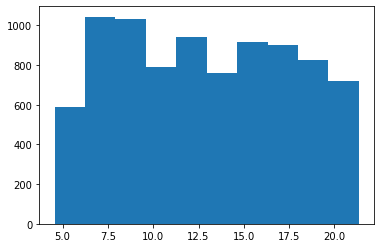

In [17]:
plt.hist(data1['Item_Weight'])
plt.show()

In [18]:
#we can fill the next vaccent place with the median value

In [19]:
for cols in ['Item_Weight']:
    data1[cols]=data1[cols].fillna(data1[cols].median())
data1.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [20]:
data1['Item_Weight'].median()

12.65

In [21]:
#Item_Fat_Content

In [22]:
data1['Item_Fat_Content'].nunique()

5

In [23]:
data1['Item_Fat_Content'].unique()

array(['Low Fat', 'LF', 'Regular', 'reg', 'low fat'], dtype=object)

In [24]:
data1.loc[(data1['Item_Fat_Content']=='LF') | (data1['Item_Fat_Content']=='low fat'),'Item_Fat_Content']='Low Fat'
data1.loc[(data1['Item_Fat_Content']=='reg'),'Item_Fat_Content']='Regular'

if data1['Item_Fat_Content']=='LF':
    data1['Item_Fat_Content']='Low Fat'
if data1['Item_Fat_Content']=='low fat':
    data1['Item_Fat_Content']='Low Fat'
if data1['Item_Fat_Content']=='reg':
    data1['Item_Fat_Content']='Regular'


In [25]:
data1['Item_Fat_Content'].nunique()

2

In [26]:
data1['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [27]:
#Item_Visibility

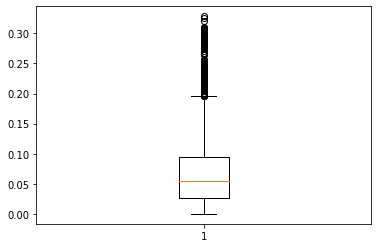

In [28]:
plt.boxplot(data['Item_Visibility'])
plt.show()

In [29]:
data1['Item_Visibility'].nunique()

7880

In [30]:
data1.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
831,FDA15,9.3,Low Fat,0.016055,Dairy,250.2092,OUT045,2002,NaN,Tier 2,Supermarket Type1,5976.2208
2599,FDA15,9.3,Low Fat,0.016019,Dairy,248.5092,OUT035,2004,Small,Tier 2,Supermarket Type1,6474.2392


In [31]:
#item type

In [32]:
data1['Item_Type'].nunique()

16

In [33]:
data1['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [34]:
itemtype=data1['Item_Type'].unique()

In [35]:
#Outlet_Identifier

In [36]:
data1['Outlet_Identifier'].nunique()

10

In [37]:
data1['Outlet_Identifier'].unique()

array(['OUT049', 'OUT045', 'OUT035', 'OUT018', 'OUT010', 'OUT013',
       'OUT027', 'OUT017', 'OUT046', 'OUT019'], dtype=object)

In [38]:
outlietid=data1['Outlet_Identifier'].unique()

In [39]:
#Outlet_Size

In [40]:
data1['Outlet_Size'].nunique()

3

In [41]:
data1['Outlet_Size'].unique()

array(['Medium', nan, 'Small', 'High'], dtype=object)

In [42]:
data1['Outlet_Size'].unique()

array(['Medium', nan, 'Small', 'High'], dtype=object)

In [43]:
data1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
831,FDA15,9.3,Low Fat,0.016055,Dairy,250.2092,OUT045,2002,NaN,Tier 2,Supermarket Type1,5976.2208
2599,FDA15,9.3,Low Fat,0.016019,Dairy,248.5092,OUT035,2004,Small,Tier 2,Supermarket Type1,6474.2392
2643,FDA15,9.3,Low Fat,0.016088,Dairy,249.6092,OUT018,2009,Medium,Tier 3,Supermarket Type2,5976.2208
4874,FDA15,9.3,Low Fat,0.026818,Dairy,248.9092,OUT010,1998,NaN,Tier 3,Grocery Store,498.0184


In [44]:
data1.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [45]:
data_1=pd.DataFrame(columns=['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility','Item_Type', 'Item_MRP', 'Outlet_Identifier','Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type','Outlet_Type', 'Item_Outlet_Sales'])

In [46]:
df_1=[]
for i in itemtype:
    dataframe_1=data1[data1['Item_Type']==i]
    modevalue=dataframe_1['Outlet_Size'].mode()
    dataframe_1['Outlet_Size']=dataframe_1['Outlet_Size'].fillna(modevalue[0])
    df_1.append(dataframe_1)

C:\Users\chris\AppData\Local\Temp\ipykernel_5480\3934383828.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe_1['Outlet_Size']=dataframe_1['Outlet_Size'].fillna(modevalue[0])
C:\Users\chris\AppData\Local\Temp\ipykernel_5480\3934383828.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe_1['Outlet_Size']=dataframe_1['Outlet_Size'].fillna(modevalue[0])
C:\Users\chris\AppData\Local\Temp\ipykernel_5480\3934383828.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

In [47]:
data_1=pd.concat(df_1)

In [48]:
data_1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
831,FDA15,9.3,Low Fat,0.016055,Dairy,250.2092,OUT045,2002,Medium,Tier 2,Supermarket Type1,5976.2208
2599,FDA15,9.3,Low Fat,0.016019,Dairy,248.5092,OUT035,2004,Small,Tier 2,Supermarket Type1,6474.2392
2643,FDA15,9.3,Low Fat,0.016088,Dairy,249.6092,OUT018,2009,Medium,Tier 3,Supermarket Type2,5976.2208
4874,FDA15,9.3,Low Fat,0.026818,Dairy,248.9092,OUT010,1998,Medium,Tier 3,Grocery Store,498.0184


In [49]:
data_1.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [50]:
data1[data1['Outlet_Identifier']=='OUT017']

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7543,FDA15,9.300,Low Fat,0.016113,Dairy,248.8092,OUT017,2007,NaN,Tier 2,Supermarket Type1,5976.2208
2272,DRC01,5.920,Regular,0.019309,Soft Drinks,49.0692,OUT017,2007,NaN,Tier 2,Supermarket Type1,1478.0760
2907,NCD19,8.930,Low Fat,0.013254,Household,56.4614,OUT017,2007,NaN,Tier 2,Supermarket Type1,828.9210
1912,FDP36,10.395,Regular,0.091688,Baking Goods,49.0008,OUT017,2007,NaN,Tier 2,Supermarket Type1,860.2136
6802,FDO10,13.650,Regular,0.012824,Snack Foods,55.5588,OUT017,2007,NaN,Tier 2,Supermarket Type1,916.1408
...,...,...,...,...,...,...,...,...,...,...,...,...
7877,NCD55,14.000,Low Fat,0.024469,Household,41.1454,OUT017,2007,NaN,Tier 2,Supermarket Type1,503.3448
5577,FDN51,17.850,Regular,0.021065,Meat,261.5936,OUT017,2007,NaN,Tier 2,Supermarket Type1,6002.8528
5717,NCX17,21.250,Low Fat,0.114246,Health and Hygiene,231.2300,OUT017,2007,NaN,Tier 2,Supermarket Type1,3029.3900
8260,FDD28,10.695,Low Fat,0.000000,Frozen Foods,60.5904,OUT017,2007,NaN,Tier 2,Supermarket Type1,410.1328


In [51]:
data_1[data_1['Outlet_Identifier']=='OUT017']

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7543,FDA15,9.300,Low Fat,0.016113,Dairy,248.8092,OUT017,2007,Medium,Tier 2,Supermarket Type1,5976.2208
4760,FDU02,13.350,Low Fat,0.103091,Dairy,229.9352,OUT017,2007,Medium,Tier 2,Supermarket Type1,2519.3872
5499,FDE51,5.925,Regular,0.097013,Dairy,42.9086,OUT017,2007,Medium,Tier 2,Supermarket Type1,758.3462
127,FDV38,19.250,Low Fat,0.102350,Dairy,52.7956,OUT017,2007,Medium,Tier 2,Supermarket Type1,928.1252
4969,FDS02,10.195,Regular,0.146692,Dairy,194.5794,OUT017,2007,Medium,Tier 2,Supermarket Type1,4096.6674
...,...,...,...,...,...,...,...,...,...,...,...,...
6112,FDG33,5.365,Regular,0.141034,Seafood,173.6764,OUT017,2007,Medium,Tier 2,Supermarket Type1,858.8820
8496,FDJ57,7.420,Regular,0.021696,Seafood,185.3582,OUT017,2007,Medium,Tier 2,Supermarket Type1,3715.1640
5447,FDI57,19.850,Low Fat,0.054331,Seafood,198.7768,OUT017,2007,Medium,Tier 2,Supermarket Type1,4532.7664
4952,FDK45,11.650,Low Fat,0.034050,Seafood,112.2860,OUT017,2007,Medium,Tier 2,Supermarket Type1,452.7440


In [52]:
data2=pd.DataFrame(columns=['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility','Item_Type', 'Item_MRP', 'Outlet_Identifier','Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type','Outlet_Type'])
df2=[]
for i in outlietid:
    dataframe2=data_1[data_1['Outlet_Identifier']==i]
    modevalue=dataframe2['Outlet_Size'].mode()
    dataframe2['Outlet_Size']=dataframe2['Outlet_Size'].fillna(modevalue[0])
    df2.append(dataframe2)

C:\Users\chris\AppData\Local\Temp\ipykernel_5480\3841433393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe2['Outlet_Size']=dataframe2['Outlet_Size'].fillna(modevalue[0])
C:\Users\chris\AppData\Local\Temp\ipykernel_5480\3841433393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe2['Outlet_Size']=dataframe2['Outlet_Size'].fillna(modevalue[0])
C:\Users\chris\AppData\Local\Temp\ipykernel_5480\3841433393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

In [53]:
data2=pd.concat(df2)

In [54]:
data2.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
7772,FDA03,18.50,Regular,0.045534,Dairy,146.3102,OUT049,1999,Medium,Tier 1,Supermarket Type1,3645.2550
4414,FDU02,13.35,Low Fat,0.102671,Dairy,228.6352,OUT049,1999,Medium,Tier 1,Supermarket Type1,3435.5280
8168,FDV38,19.25,Low Fat,0.101932,Dairy,54.5956,OUT049,1999,Medium,Tier 1,Supermarket Type1,764.3384
1320,FDM39,6.42,Low Fat,0.053554,Dairy,178.6002,OUT049,1999,Medium,Tier 1,Supermarket Type1,3582.0040


## data2

In [55]:
data2['Outlet_Size'].unique()

array(['Medium', 'Small', 'High'], dtype=object)

In [56]:
data2.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [57]:
data2['Outlet_Location_Type'].unique()

array(['Tier 1', 'Tier 2', 'Tier 3'], dtype=object)

In [58]:
data2['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [59]:
data3=data2

In [60]:
data3.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138
7772,FDA03,18.50,Regular,0.045534,Dairy,146.3102,OUT049,1999,Medium,Tier 1,Supermarket Type1,3645.255
4414,FDU02,13.35,Low Fat,0.102671,Dairy,228.6352,OUT049,1999,Medium,Tier 1,Supermarket Type1,3435.528


data 3

In [61]:
#we can make use of data3 for the rest preprocessing

<AxesSubplot:>

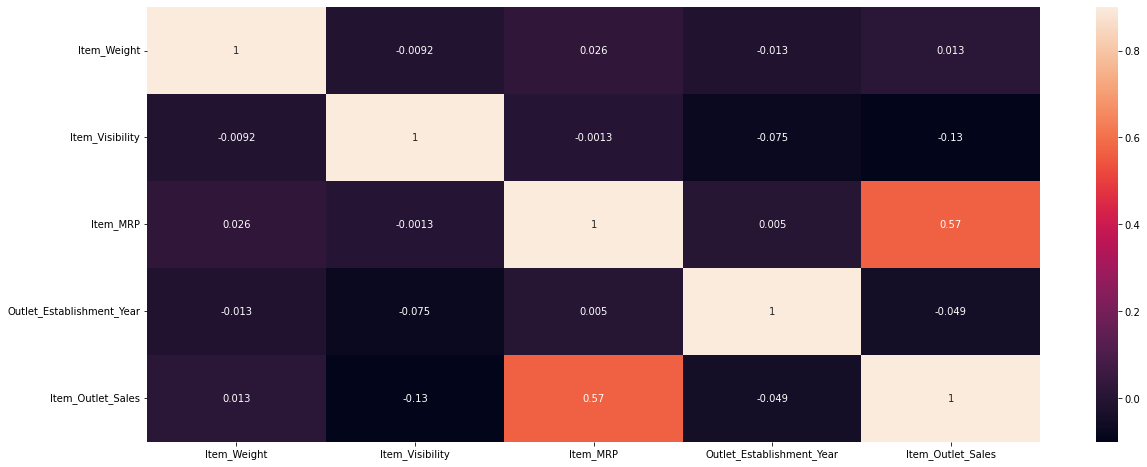

In [62]:
corrmatrix=data3.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corrmatrix,vmin=-0.1, vmax=0.9, annot=True)

In [63]:
data3.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [64]:
data4=data3.drop(['Item_Visibility','Outlet_Establishment_Year'],axis=1)

Data4 is the data after droping least related factors

In [65]:
data4.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

Encoding of the values

In [66]:
from sklearn.preprocessing import LabelEncoder

In [67]:
LE=LabelEncoder()

In [68]:
data4['Item_Fat_Content']=LE.fit_transform(data4['Item_Fat_Content'])
data4.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,0,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380
7772,FDA03,18.50,1,Dairy,146.3102,OUT049,Medium,Tier 1,Supermarket Type1,3645.2550
4414,FDU02,13.35,0,Dairy,228.6352,OUT049,Medium,Tier 1,Supermarket Type1,3435.5280
8168,FDV38,19.25,0,Dairy,54.5956,OUT049,Medium,Tier 1,Supermarket Type1,764.3384
1320,FDM39,6.42,0,Dairy,178.6002,OUT049,Medium,Tier 1,Supermarket Type1,3582.0040


In [69]:
data4['Item_Type']=LE.fit_transform(data4['Item_Type'])
data4.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,0,4,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380
7772,FDA03,18.50,1,4,146.3102,OUT049,Medium,Tier 1,Supermarket Type1,3645.2550
4414,FDU02,13.35,0,4,228.6352,OUT049,Medium,Tier 1,Supermarket Type1,3435.5280
8168,FDV38,19.25,0,4,54.5956,OUT049,Medium,Tier 1,Supermarket Type1,764.3384
1320,FDM39,6.42,0,4,178.6002,OUT049,Medium,Tier 1,Supermarket Type1,3582.0040


In [70]:
data4['Outlet_Identifier']=LE.fit_transform(data4['Outlet_Identifier'])
data4.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,0,4,249.8092,9,Medium,Tier 1,Supermarket Type1,3735.1380
7772,FDA03,18.50,1,4,146.3102,9,Medium,Tier 1,Supermarket Type1,3645.2550
4414,FDU02,13.35,0,4,228.6352,9,Medium,Tier 1,Supermarket Type1,3435.5280
8168,FDV38,19.25,0,4,54.5956,9,Medium,Tier 1,Supermarket Type1,764.3384
1320,FDM39,6.42,0,4,178.6002,9,Medium,Tier 1,Supermarket Type1,3582.0040


In [71]:
data4['Outlet_Location_Type']=LE.fit_transform(data4['Outlet_Location_Type'])
data4.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,0,4,249.8092,9,Medium,0,Supermarket Type1,3735.1380
7772,FDA03,18.50,1,4,146.3102,9,Medium,0,Supermarket Type1,3645.2550
4414,FDU02,13.35,0,4,228.6352,9,Medium,0,Supermarket Type1,3435.5280
8168,FDV38,19.25,0,4,54.5956,9,Medium,0,Supermarket Type1,764.3384
1320,FDM39,6.42,0,4,178.6002,9,Medium,0,Supermarket Type1,3582.0040


In [72]:
data4['Outlet_Type']=LE.fit_transform(data4['Outlet_Type'])
data4.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,0,4,249.8092,9,Medium,0,1,3735.1380
7772,FDA03,18.50,1,4,146.3102,9,Medium,0,1,3645.2550
4414,FDU02,13.35,0,4,228.6352,9,Medium,0,1,3435.5280
8168,FDV38,19.25,0,4,54.5956,9,Medium,0,1,764.3384
1320,FDM39,6.42,0,4,178.6002,9,Medium,0,1,3582.0040


In [73]:
data4['Outlet_Size']=LE.fit_transform(data4['Outlet_Size'])
data4.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,0,4,249.8092,9,1,0,1,3735.1380
7772,FDA03,18.50,1,4,146.3102,9,1,0,1,3645.2550
4414,FDU02,13.35,0,4,228.6352,9,1,0,1,3435.5280
8168,FDV38,19.25,0,4,54.5956,9,1,0,1,764.3384
1320,FDM39,6.42,0,4,178.6002,9,1,0,1,3582.0040


data after encoding 

In [75]:
x=data4.drop(['Item_Outlet_Sales','Item_Identifier'],axis=1)
y=data4['Item_Outlet_Sales']

Model creation and Analysis of the Model

In [76]:
from sklearn.model_selection import train_test_split

In [77]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [78]:
from sklearn.linear_model import LinearRegression,Lasso

In [79]:
lr=LinearRegression()
ls=Lasso()

In [80]:
lr_model=lr.fit(X_train,Y_train)
y_prd_lr=lr_model.predict(X_test)

In [81]:
from sklearn.metrics import mean_squared_error,r2_score

In [82]:
print('mean Squred Error=', mean_squared_error(Y_test,y_prd_lr))
print('r2 score=', mean_squared_error(Y_test,y_prd_lr))

mean Squred Error= 1446070.585592129
r2 score= 1446070.585592129


In [83]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,random_state=42,test_size=0.3)
lr_model_1=lr.fit(X_train,Y_train)
y_prd_lr_1=lr_model_1.predict(X_test)
print('mean Squred Error=', mean_squared_error(Y_test,y_prd_lr_1))
print('r2 score=', mean_squared_error(Y_test,y_prd_lr_1))

mean Squred Error= 1449550.8853215415
r2 score= 1449550.8853215415


In [84]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,random_state=42,test_size=0.25)
lr_model_2=lr.fit(X_train,Y_train)
y_prd_lr_2=lr_model_2.predict(X_test)
print('mean Squred Error=', mean_squared_error(Y_test,y_prd_lr_2))
print('r2 score=', mean_squared_error(Y_test,y_prd_lr_2))

mean Squred Error= 1463176.9511599357
r2 score= 1463176.9511599357


In [85]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,random_state=42,test_size=0.26)
lr_model_3=lr.fit(X_train,Y_train)
y_prd_lr_3=lr_model_3.predict(X_test)
print('mean Squred Error=', mean_squared_error(Y_test,y_prd_lr_3))
print('r2 score=', mean_squared_error(Y_test,y_prd_lr_3))

mean Squred Error= 1470464.5250040845
r2 score= 1470464.5250040845


test size 0.26 gives better value

In [87]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,random_state=42,test_size=0.27)
lr_model_4=lr.fit(X_train,Y_train)
y_prd_lr_4=lr_model_4.predict(X_test)
print('mean Squred Error=', mean_squared_error(Y_test,y_prd_lr_4))
print('r2 score=', mean_squared_error(Y_test,y_prd_lr_4))

mean Squred Error= 1465779.9764418006
r2 score= 1465779.9764418006


In [88]:
#lasso

In [89]:
ls_model=ls.fit(X_train,Y_train)
y_ls_model_prd=ls_model.predict(X_test)

In [90]:
print('mean Squred Error=', mean_squared_error(Y_test,y_ls_model_prd))
print('r2 score=', mean_squared_error(Y_test,y_ls_model_prd))

mean Squred Error= 1466051.033061195
r2 score= 1466051.033061195


In [91]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,random_state=42,test_size=0.3)
ls_model_1=ls.fit(X_train,Y_train)
y_ls_model_prd_1=ls_model_1.predict(X_test)
print('mean Squred Error=', mean_squared_error(Y_test,y_ls_model_prd_1))
print('r2 score=', mean_squared_error(Y_test,y_ls_model_prd_1))

mean Squred Error= 1449812.7155268674
r2 score= 1449812.7155268674


In [92]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,random_state=42,test_size=0.25)
ls_model_2=ls.fit(X_train,Y_train)
y_ls_model_prd_2=ls_model_2.predict(X_test)
print('mean Squred Error=', mean_squared_error(Y_test,y_ls_model_prd_2))
print('r2 score=', mean_squared_error(Y_test,y_ls_model_prd_2))

mean Squred Error= 1463438.8892153369
r2 score= 1463438.8892153369


In [93]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,random_state=42,test_size=0.26)
ls_model_3=ls.fit(X_train,Y_train)
y_ls_model_prd_3=ls_model_3.predict(X_test)
print('mean Squred Error=', mean_squared_error(Y_test,y_ls_model_prd_3))
print('r2 score=', mean_squared_error(Y_test,y_ls_model_prd_3))

mean Squred Error= 1470707.890031711
r2 score= 1470707.890031711


In [94]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,random_state=42,test_size=0.27)
ls_model_4=ls.fit(X_train,Y_train)
y_ls_model_prd_4=ls_model_4.predict(X_test)
print('mean Squred Error=', mean_squared_error(Y_test,y_ls_model_prd_4))
print('r2 score=', mean_squared_error(Y_test,y_ls_model_prd_4))

mean Squred Error= 1466051.033061195
r2 score= 1466051.033061195


test size 0.26 is better

 we are saving the best model made into a file with the help of pickle library

In [97]:
import pickle

In [98]:
pickle.dump(ls_model_3,open('model_submit1.pkl','wb'))

the model which is created can be used to predict value of test dataset after preprocessing the test dataset and importing this model and assiging the values of the test dataset to predict the Item_Outlet_Sales

The rest of the processing is done on the test data file